In [7]:
import pandas as pd

In [8]:
dataset=pd.read_csv("PrePlacement.csv")

In [9]:
dataset.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [10]:
import seaborn as sns

In [11]:
#!pip install seaborn

C:\Users\aravi\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


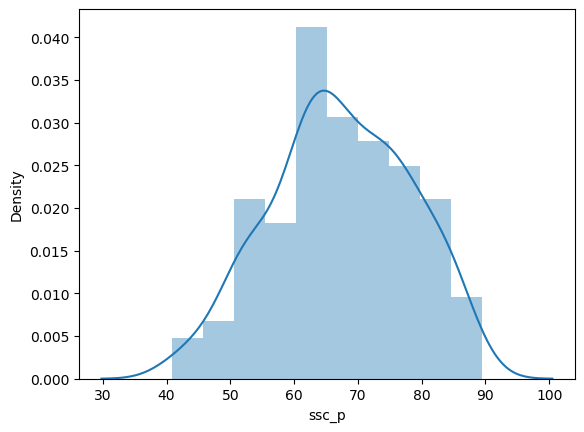

In [12]:
sns.distplot(dataset["ssc_p"])

In [13]:
#what is the probability of getting mark range from 60 to 70 of ssc_p column
def get_pdf_probability(dataset,startrange,endrange):
    #Matplotlib is a plotting library for creating static, animated, and interactive visualizations in Python
    from matplotlib import pyplot
    # inbuilt function for normal distribution so we import this library
    # This will import the norm object from the stats module of Scipy. 
    # The norm object provides various methods for working with the Normal distribution such as 
    # calculating probabilities, generating random numbers, and fitting data to a Normal distribution.
    from scipy.stats import norm
    # Seaborn is a library for making statistical graphics in Python.
    # Seaborn helps you explore and understand your data.
    import seaborn as sns
    # In distplot, kde(Kernel density function)=True then the curve will display
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    #axvline is vertical line start range and the color of the line is red
    pyplot.axvline(startrange,color='Red')
    #axvline is vertical line end range and the color of the line is red
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    # Print the mean and standard deviation values
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # inbuilt normal distribution function
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    # creating list through list comprehension method
    # Advantage of below line is in single line the output is converted into list it is called oneliner for loop
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
    

Mean=67.303, Standard Deviation=10.827
The area between range(60,70):0.3449514151280293


C:\Users\aravi\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


0.3449514151280293

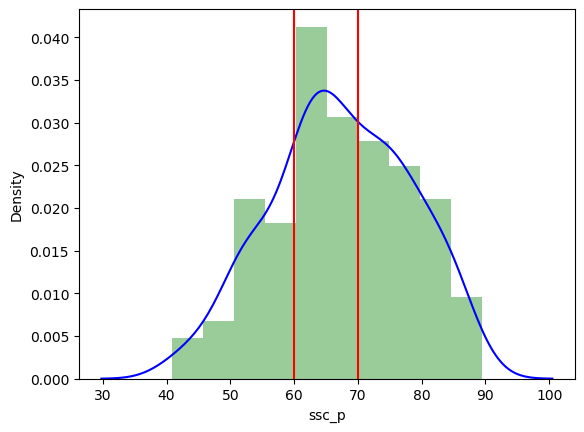

In [20]:
# Passing the parameter to the probability function
get_pdf_probability(dataset["ssc_p"],60,70)

In [17]:
#cumulative density function
#ecdf is empherical cumulative density function
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset['ssc_p'])
#80 is in which percentage we get output 
ecdf(80)

0.8651162790697674

In [16]:
#!pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 14.5 MB/s eta 0:00:00
     ---------------------------------------- 233.9/233.9 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
#Standard Normalisation
def stdNBgraph(dataset):
    # Coverted to standard Normal Distribution
    # mean and std calculation
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    # Oneliner advantage of oneliner is in single line the output is converted into list
    values=[i for i in dataset]
    #formula calculation
    z_score=[((j-mean)/std) for j in values]
    #kde(Kernel density function )=True the curve is dislayed
    sns.distplot(z_score,kde=True)
    sum(z_score)/len(z_score)
    #z_score.std()


C:\Users\aravi\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


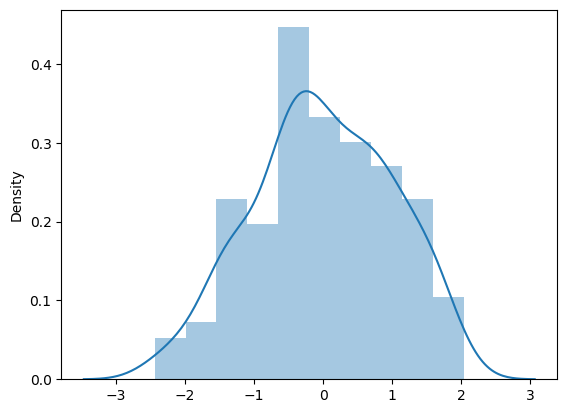

In [19]:
stdNBgraph(dataset["ssc_p"])